# Лабораторная работа 1

Годовые доходы и расходы филлипинских семей

In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Подготовка данных

In [648]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./FamilyIncomeExpenditure.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

### Преобразование параметров

In [649]:
# регион
regionDf = list(set(df["Region"].map(lambda elem: elem)))

cnt = 0
regionDict = {}
for region in regionDf:
    if region not in regionDict.keys():
        regionDict[region] = cnt
        cnt += 1
regionDict

{'IVA - CALABARZON': 0,
 'XII - SOCCSKSARGEN': 1,
 'X - Northern Mindanao': 2,
 'IX - Zasmboanga Peninsula': 3,
 'IVB - MIMAROPA': 4,
 'VIII - Eastern Visayas': 5,
 'Caraga': 6,
 'VI - Western Visayas': 7,
 'NCR': 8,
 'III - Central Luzon': 9,
 'V - Bicol Region': 10,
 'VII - Central Visayas': 11,
 'XI - Davao Region': 12,
 'I - Ilocos Region': 13,
 'CAR': 14,
 'II - Cagayan Valley': 15,
 ' ARMM': 16}

In [650]:
df['Region'] = df['Region'].map(lambda elem: regionDict[elem])

In [651]:
# основной источник дохода
sourceIncomeDf = list(set(df["Main Source of Income"].map(lambda elem: elem)))

cnt = 0
sourceIncomeDict = {}
for source in sourceIncomeDf:
    if source not in sourceIncomeDict.keys():
        sourceIncomeDict[source] = cnt
        cnt += 1
sourceIncomeDict

{'Enterpreneurial Activities': 0,
 'Wage/Salaries': 1,
 'Other sources of Income': 2}

In [652]:
df['Main Source of Income'] = df['Main Source of Income'].map(lambda elem: sourceIncomeDict[elem])

In [653]:
# занятие сельским хозяйством
df['Agricultural Household indicator'] = df['Agricultural Household indicator'].map(lambda elem: elem if elem != 2 else 1)

In [654]:
# пол
sexDict = { "Male": 0, "Female": 1 }
df['Household Head Sex'] = df['Household Head Sex'].map(lambda elem: sexDict[elem])

In [655]:
# работают/нет
jobDict = {'With Job/Business': 0, 'No Job/Business': 1}
df['Household Head Job or Business Indicator'] = df['Household Head Job or Business Indicator'].map(lambda elem: jobDict[elem])

In [656]:
del df['Imputed House Rental Value']
del df['Communication Expenditure']
del df['Miscellaneous Goods and Services Expenditure']
del df['Special Occasions Expenditure']
del df['Crop Farming and Gardening expenses']
del df['Total Income from Entrepreneurial Acitivites']
del df['Household Head Marital Status']
del df['Household Head Highest Grade Completed']
del df['Household Head Occupation']
del df['Household Head Class of Worker']
del df['Type of Household']
del df['Type of Building/House']
del df['Type of Roof']
del df['Type of Walls']
del df['House Floor Area']
del df['House Age']
del df['Number of bedrooms']
del df['Tenure Status']
del df['Toilet Facilities']
del df['Electricity']
del df['Main Source of Water Supply']
del df['Number of Television']
del df['Number of CD/VCD/DVD']
del df['Number of Component/Stereo set']
del df['Number of Refrigerator/Freezer']
del df['Number of Washing Machine']
del df['Number of Airconditioner']
del df['Number of Car, Jeep, Van']
del df['Number of Landline/wireless telephones']
del df['Number of Cellular phone']
del df['Number of Personal Computer']
del df['Number of Stove with Oven/Gas Range']
del df['Number of Motorized Banca']
del df['Number of Motorcycle/Tricycle']

In [657]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Education Expenditure,Household Head Sex,Household Head Age,Household Head Job or Business Indicator,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed
0,480332,14,117848,1,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,3457,4776,36200,1,49,0,4,0,1,1
1,198235,14,67766,1,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,3520,12900,29300,0,40,0,3,0,1,2
2,82785,14,61609,1,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,70,324,425,0,39,0,6,0,4,3
3,107589,14,78189,1,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,60,6840,300,0,52,0,3,0,3,2
4,189322,14,94625,1,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,140,6996,0,0,65,0,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,119773,1,44875,0,1,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,294,2124,50,0,42,0,6,2,0,0
41539,137320,1,31157,0,1,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,890,2568,1550,0,49,0,6,0,3,0
41540,133171,1,45882,0,1,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,540,2040,0,0,56,0,4,0,0,1
41541,129500,1,81416,0,1,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,314,2412,5295,0,34,0,9,0,3,0


#### Удаление выбросов по полю Total Household Income

<AxesSubplot:>

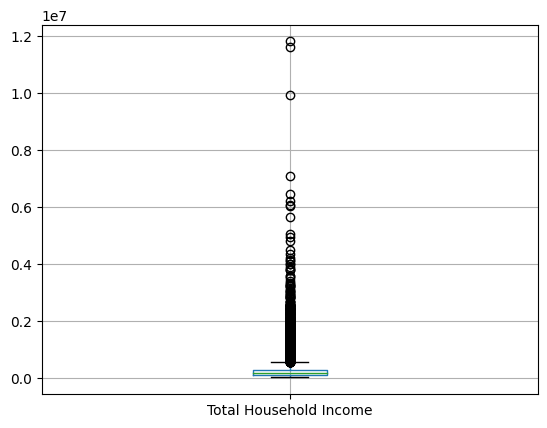

In [658]:
df.boxplot(column=['Total Household Income'])

In [659]:
tempDelete = df[df['Total Household Income'] > 0.45 * 10**6].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Bread and Cereals Expenditure

<AxesSubplot:>

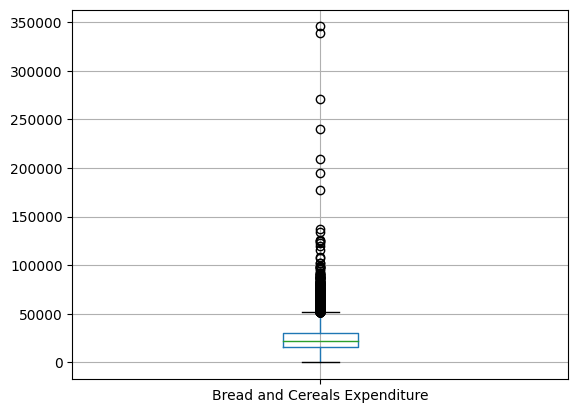

In [660]:
df.boxplot(column=['Bread and Cereals Expenditure'])

In [661]:
tempDelete = df[df['Bread and Cereals Expenditure'] > 0.6 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Total Food Expenditure

<AxesSubplot:>

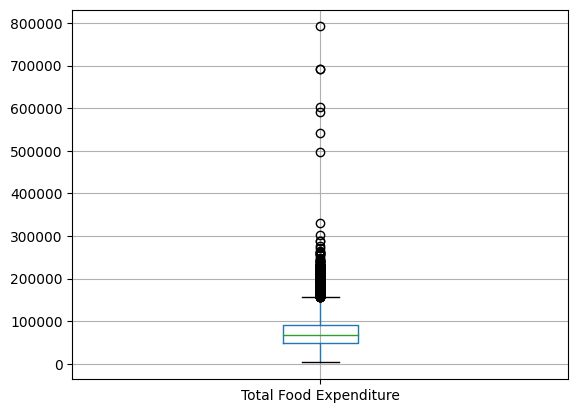

In [662]:
df.boxplot(column=['Total Food Expenditure'])

In [663]:
tempDelete = df[df['Total Food Expenditure'] > 1.7 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Total Rice Expenditure

<AxesSubplot:>

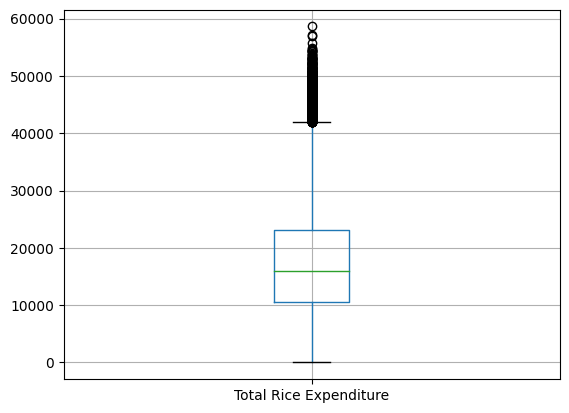

In [664]:
df.boxplot(column=['Total Rice Expenditure'])

In [665]:
tempDelete = df[df['Total Rice Expenditure'] > 0.43 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Meat Expenditure

<AxesSubplot:>

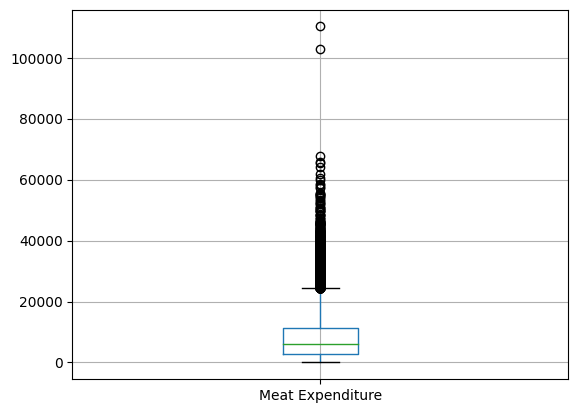

In [666]:
df.boxplot(column=['Meat Expenditure'])

In [667]:
tempDelete = df[df['Meat Expenditure'] > 0.3 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Total Fish and marine products Expenditure

<AxesSubplot:>

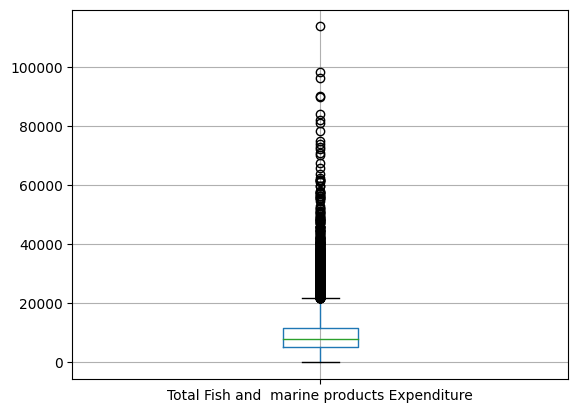

In [668]:
df.boxplot(column=['Total Fish and  marine products Expenditure'])

In [669]:
tempDelete = df[df['Total Fish and  marine products Expenditure'] > 0.25 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Fruit Expenditure

<AxesSubplot:>

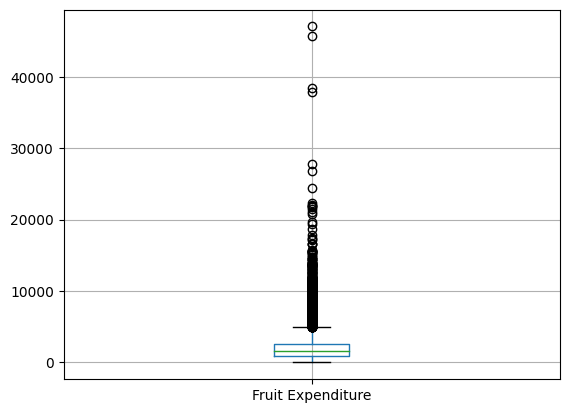

In [670]:
df.boxplot(column=['Fruit Expenditure'])

In [671]:
tempDelete = df[df['Fruit Expenditure'] > 0.6 * 10**4].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Vegetables Expenditure

<AxesSubplot:>

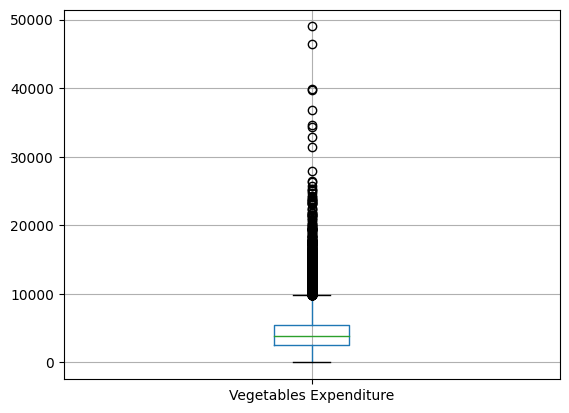

In [672]:
df.boxplot(column=['Vegetables Expenditure'])

In [673]:
tempDelete = df[df['Vegetables Expenditure'] > 0.15 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Restaurant and hotels Expenditure

<AxesSubplot:>

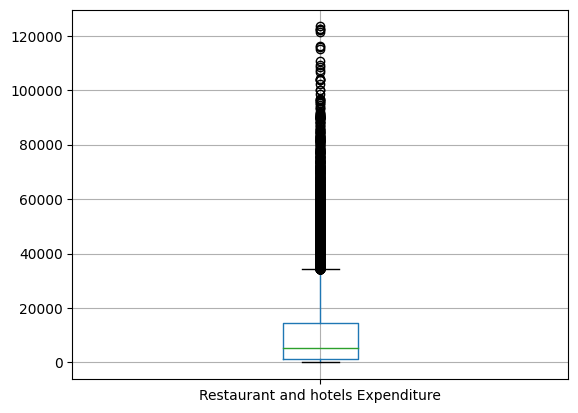

In [674]:
df.boxplot(column=['Restaurant and hotels Expenditure'])

In [675]:
tempDelete = df[df['Restaurant and hotels Expenditure'] > 0.235 * 10**5].index
df = df.drop(tempDelete, axis=0)

#### Удаление выбросов по полю Alcoholic Beverages Expenditure

<AxesSubplot:>

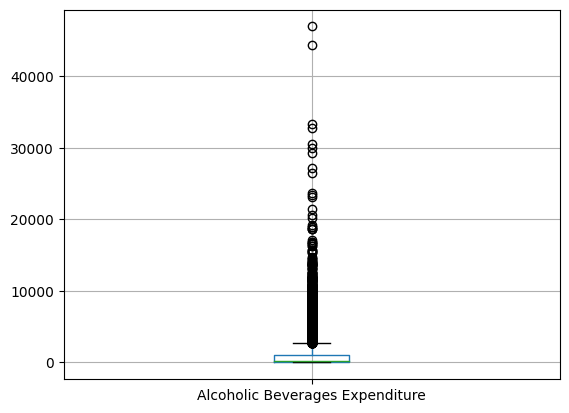

In [676]:
df.boxplot(column=['Alcoholic Beverages Expenditure'])

In [677]:
tempDelete = df[df['Alcoholic Beverages Expenditure'] > 0.14 * 10**4].index
df = df.drop(tempDelete, axis=0)

## Кластеризация, снижение размерности пространства признаков

### Общая визуализация данных

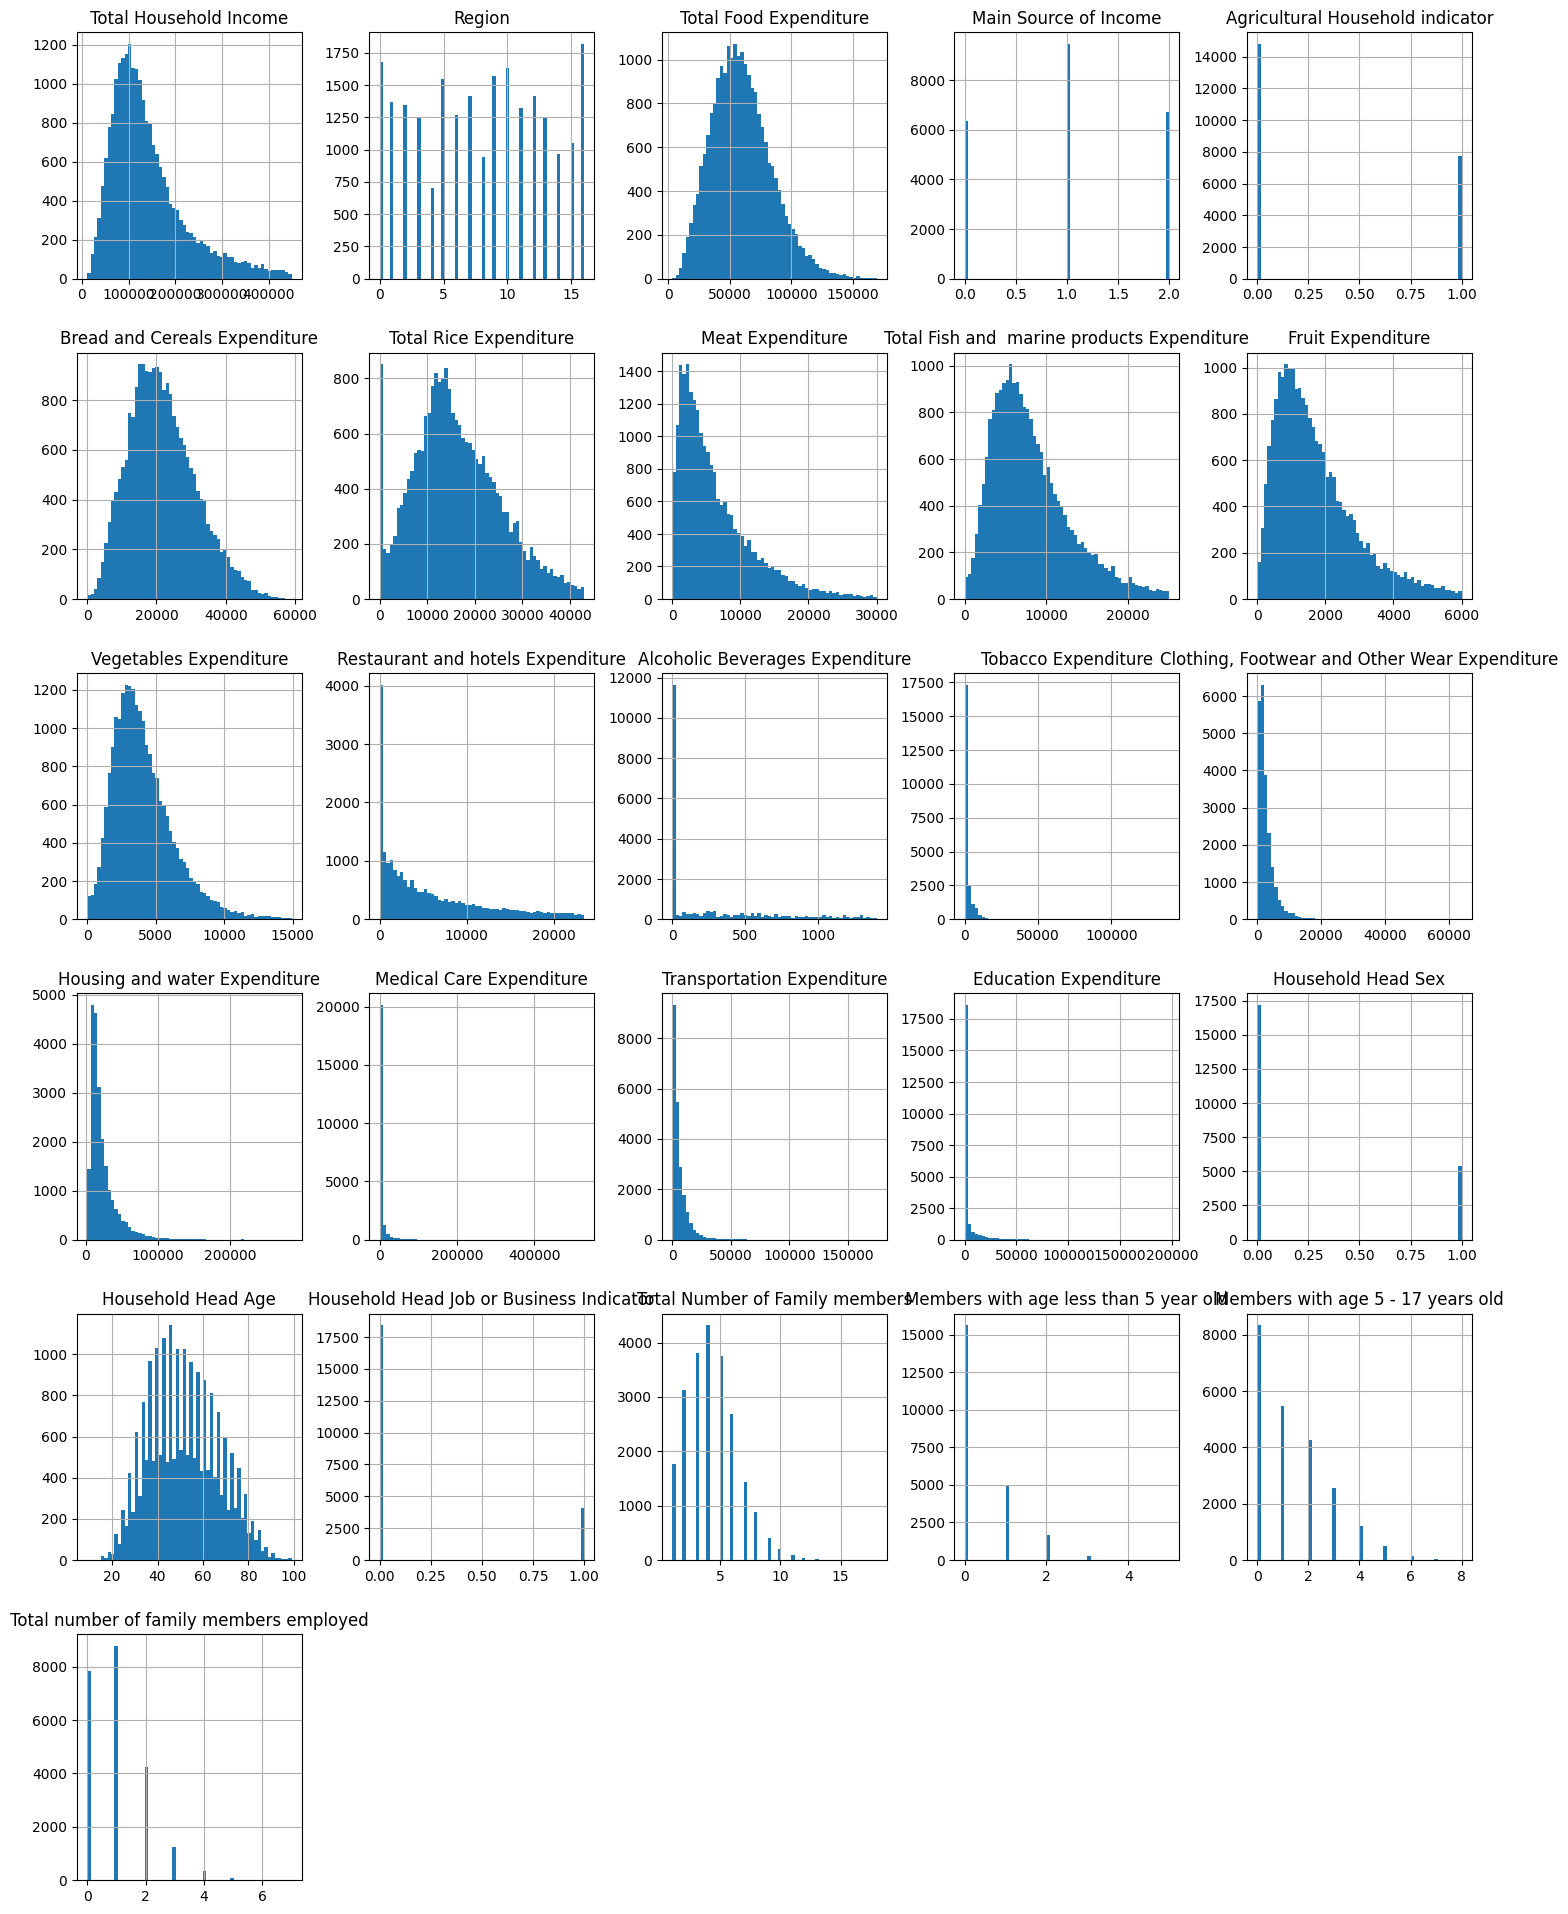

In [678]:
df.hist(bins=60, figsize=(18,24), grid=True)
plt.show()

### Тепловая карта

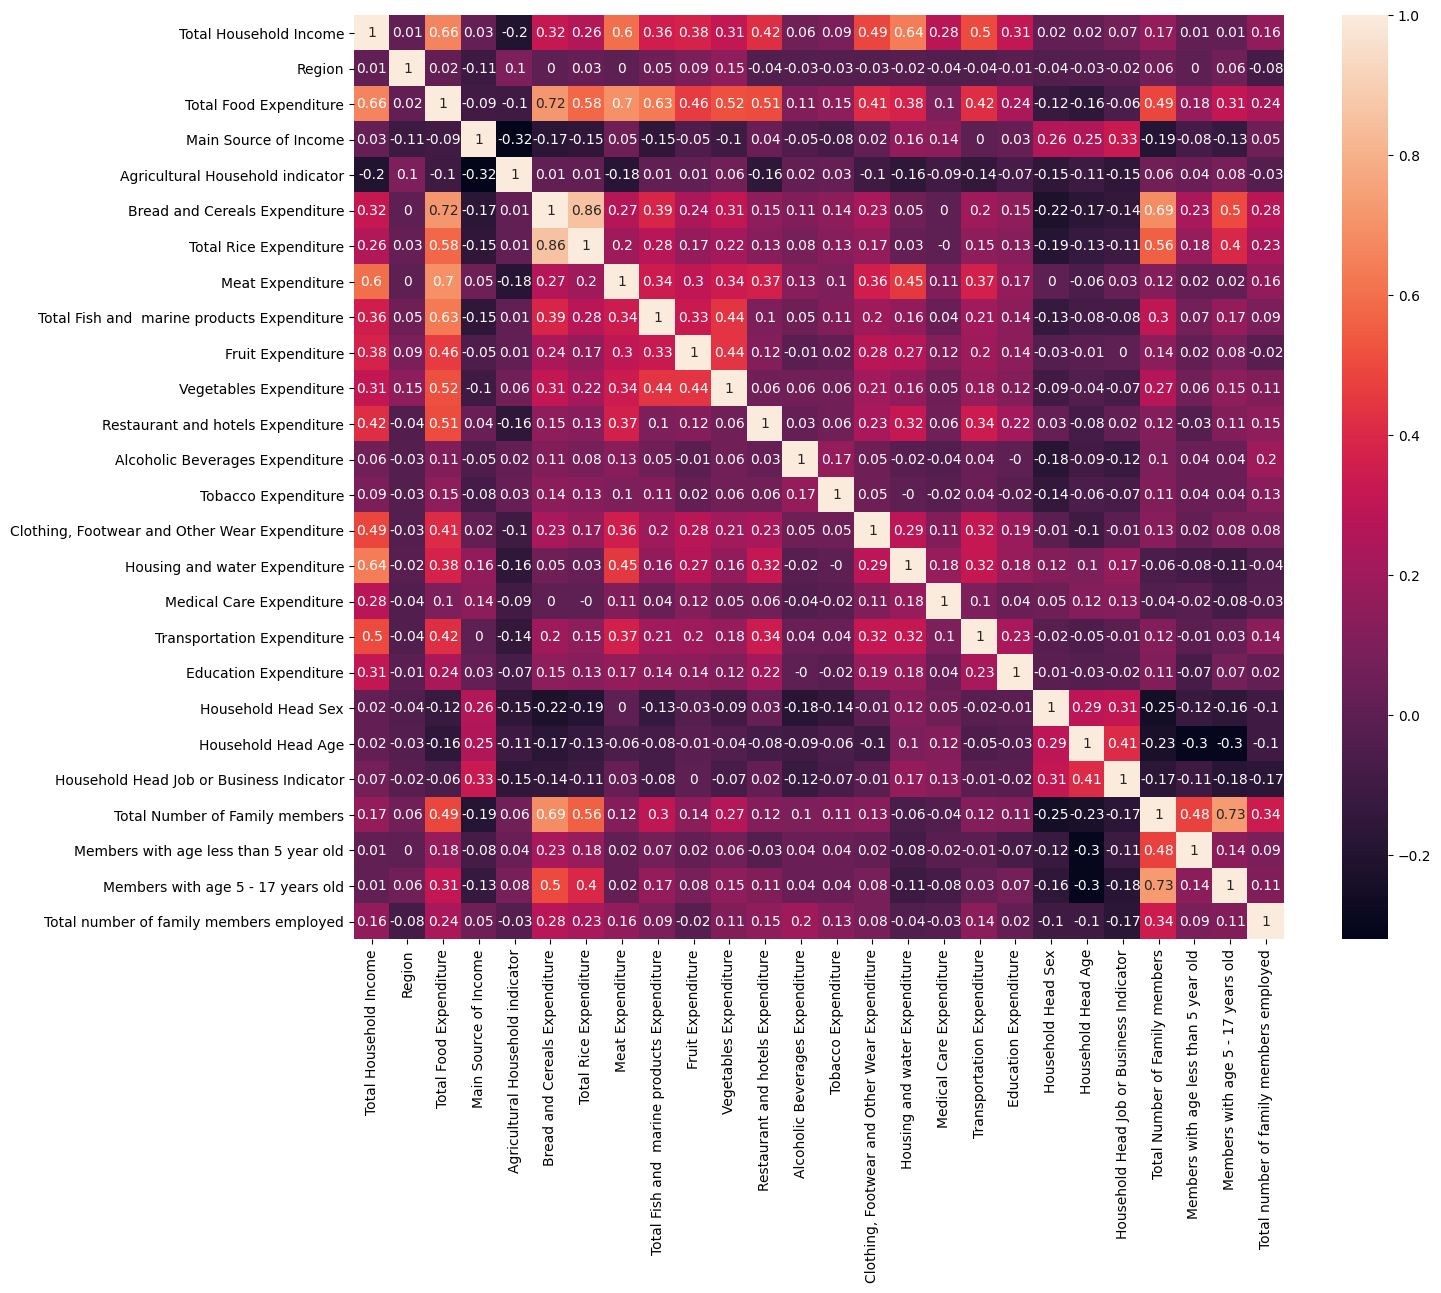

In [679]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr().round(decimals=2), annot=True)
plt.show()

In [680]:
# plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
# sns.pairplot(df, kind='reg', vars=df.columns[:-1], plot_kws=plot_kws)
# plt.show()